# Initialization

## Inport modules

In [1]:

import os, sys
def find_qcodes_local_dir():
    dirpath = os.getcwd()
    while True:
        dirpath, folder_name = os.path.split(dirpath)
        if folder_name == 'QCoDeS_local':
            return os.path.join(dirpath, folder_name)
        if not folder_name:  # Reached the root directory
            return None
qcodes_local_dir = find_qcodes_local_dir()
sys.path.append(f'{qcodes_local_dir}')

In [ ]:
import os, sys

def find_qcodes_local_dir():
    dirpath = os.getcwd()
    while True:
        dirpath, folder_name = os.path.split(dirpath)
        if folder_name == 'QCoDeS_local':
            return os.path.join(dirpath, folder_name)
        if not folder_name:  # Reached the root directory
            return None

qcodes_local_dir = find_qcodes_local_dir()
if qcodes_local_dir:
    sys.path.append(qcodes_local_dir)
    drivers_path = os.path.join(qcodes_local_dir, 'drivers')
    sys.path.append(drivers_path)
    fridge_specific_path = os.path.join(qcodes_local_dir, 'fridge_specific')
    sys.path.append(fridge_specific_path)
    # 檢查 init_BF1.py 是否存在於 fridge_specific 資料夾中
    init_bf1_path = os.path.join(fridge_specific_path, 'init_BF1.py')
    if os.path.isfile(init_bf1_path):
        print(f"Found init_BF1.py at: {init_bf1_path}")
        exec(open(f'{init_bf1_path}').read())  
    else:
        print("init_BF1.py not found in fridge_specific folder.")

# print(sys.path)

In [ ]:
exec(open('init_station_BF1.py').read())

In [ ]:
import os

# 獲取當前路徑
dirpath = os.getcwd()

# 獲取父資料夾路徑
parent_dirpath = os.path.dirname(dirpath)

# 獲取父父資料夾路徑
grandparent_dirpath = os.path.dirname(parent_dirpath)

print("當前路徑:", dirpath)
print("父資料夾路徑:", parent_dirpath)
print("父父資料夾路徑:", grandparent_dirpath)

In [ ]:
import os

def find_init_py():
    dirpath = os.getcwd()
    while True:
        init_py_path = os.path.join(dirpath, 'init.py')
        if os.path.isfile(init_py_path):
            return init_py_path
        new_dirpath, _ = os.path.split(dirpath)
        if new_dirpath == dirpath:  # Reached the root directory
            return None
        dirpath = new_dirpath

init_py_path = find_init_py()
%run '{init_py_path}'

In [2]:
%matplotlib ipympl
import os, sys
import time
import pyvisa
import warnings
import numpy as np
import qcodes as qc
import plotly.graph_objects as go
import matplotlib.pyplot as plt

def find_qcodes_local_dir():
    dirpath = os.getcwd()
    while True:
        dirpath, folder_name = os.path.split(dirpath)
        if folder_name == 'QCoDeS_local':
            return os.path.join(dirpath, folder_name)
        if not folder_name:  # Reached the root directory
            return None
qcodes_local_dir = find_qcodes_local_dir()
sys.path.append(f'{qcodes_local_dir}')

from tqdm import tqdm
from pprint import pprint
from time import sleep, monotonic, time
from IPython.display import clear_output
from qcodes.dataset.measurements import Measurement
from qcodes.utils.metadata import diff_param_values
from qcodes.dataset.plotting import plot_dataset, plot_by_id
from qcodes import Parameter, ManualParameter, ScaledParameter
from qcodes.instrument.specialized_parameters import ElapsedTimeParameter
from sweeps_v2 import do1d, do2d, time_sweep, measure_until, do1d_until

print('Imported all modules, QCoDeS version:', qc.__version__, 'initialized')

# warnings.filterwarnings('ignore')

Imported all modules, QCoDeS version: 0.38.1 initialized


In [3]:
def find_qcodes_local_dir():
    dirpath = os.getcwd()
    while True:
        dirpath, folder_name = os.path.split(dirpath)
        if folder_name == 'QCoDeS_local':
            return os.path.join(dirpath, folder_name)
        if not folder_name:  # Reached the root directory
            return None
qcodes_local_dir = find_qcodes_local_dir()

In [4]:
qcodes_local_dir

'c:\\Users\\admin\\Documents\\GitHub\\QCoDeS_local'

In [5]:
def find_init_fridge_py():
    for root, dirs, files in os.walk(qcodes_local_dir):
        if 'init_fridge.py' in files:
            return os.path.join(root, 'init_fridge.py')
    return None

init_fridge_py_path = find_init_fridge_py()
init_fridge_py_path

'c:\\Users\\admin\\Documents\\GitHub\\QCoDeS_local\\init_fridge.py'

In [6]:
def find_init_fridge_v2_py():
    for root, dirs, files in os.walk(qcodes_local_dir):
        if 'init_fridge_v2.py' in files:
            return os.path.join(root, 'init_fridge_v2.py')
    return None

init_fridge_v2_py_path = find_init_fridge_v2_py()
init_fridge_v2_py_path

'c:\\Users\\admin\\Documents\\GitHub\\QCoDeS_local\\init_fridge_v2.py'

In [7]:
fridge_name = 'BF1'
%run "{init_fridge_py_path}" {fridge_name}

ModuleNotFoundError: No module named 'Kei213_2'

In [7]:
fridge_name = 'BF1'
%run "{init_fridge_v2_py_path}" {fridge_name}

Found init_BF1_v2.py at: c:\Users\admin\Documents\GitHub\QCoDeS_local\fridge_specific\init_BF1_v2.py
Error connecting to TCPIP0::K-E5080B-02870::inst0::INSTR: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.


[K2440(Keithley2400)] Snapshot: Could not update parameter: volt
[K2440(Keithley2400)] Snapshot: Could not update parameter: curr
[K2440(Keithley2400)] Snapshot: Could not update parameter: resistance


Error connecting to ASRL1::INSTR: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.
Device: GPIB0::7::INSTR
IDN: KEITHLEY INSTRUMENTS,MODEL DMM6500,04518181,1.7.7b

Connected to: KEITHLEY INSTRUMENTS DMM6500 (serial:04518181, firmware:1.7.7b) in 0.02s
Added Keithley DMM6500 at GPIB0::7::INSTR to the station.
Device: GPIB0::22::INSTR
IDN: KEITHLEY INSTRUMENTS INC.,MODEL 2440,1225508,C30   Mar 17 2006 09:29:29/A02  /B/A

Connected to: KEITHLEY INSTRUMENTS INC. 2440 (serial:1225508, firmware:C30   Mar 17 2006 09:29:29/A02  /B/A) in 0.03s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-22-114, firmware:3.15) in 2.43s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-22-113, firmware:3.15) in 0.81s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-22-111, firmware:3.15) in 1.10s
z, IP: 169.254.115.3, Port: 7180
y, IP: 169.254.115.2, Port: 7180
x, IP: 169.254.115.1, Port: 7180


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\qcodes\instrument\instrument_base.py:543: UserWarning: Changed AMI430-3D to AMI430_3D for instrument identifier
  warnings.warn(f"Changed {name} to {new_name} for instrument identifier")


Added z to the station.
Added y to the station.
Added x to the station.
Added AMI430_3D to the station.

Station list:
{'AMI430_3D': <AMI430_3D: AMI430_3D>,
 'DMM6500': <Keithley_6500: DMM6500>,
 'K2440': <Keithley2400: K2440>,
 'x': <AMI430: x>,
 'y': <AMI430: y>,
 'z': <AMI430: z>}


In [8]:
snapshot_of_station = station.snapshot()
pprint(snapshot_of_station)

{'components': {},
 'config': None,
 'instruments': {'AMI430_3D': {'__class__': 'qcodes.instrument_drivers.american_magnetics.AMI430.AMI430_3D',
                               'functions': {},
                               'label': 'AMI430_3D',
                               'name': 'AMI430_3D',
                               'parameters': {'IDN': {'__class__': 'qcodes.parameters.parameter.Parameter',
                                                      'full_name': 'AMI430_3D_IDN',
                                                      'instrument': 'qcodes.instrument_drivers.american_magnetics.AMI430.AMI430_3D',
                                                      'instrument_name': 'AMI430_3D',
                                                      'inter_delay': 0,
                                                      'label': 'IDN',
                                                      'name': 'IDN',
                                                      'post_delay': 0,
         

## Keithley 2440

### sensitive check

In [9]:
K2440.mode('VOLT')
K2440.mode()

'VOLT'

In [11]:
K2440.output(1) # output on
K2440.rangev(1)
K2440.volt(0)
K2440.compliancei(100e-3)
sleep(1)
v_read=DMM6500.amplitude()
K2440.output(0) #output off
print(v_read)

-0.0004587287


## TG 2400

In [ ]:
K2440.output(1) # output on
K2440.rangev(22)
K2440.volt(0)
K2440.compliancei(100e-3)
# K2440.output(0) #output off
sleep(1)
v_read=DMM6500.amplitude()
print(v_read)

In [ ]:
K2440.volt(1)
K2440.output(0) #output off

In [ ]:
K2440.rangev(1)
K2440.rangev()

#  Database initialisation

In [9]:
def find_init_database_v3_py():
    for root, dirs, files in os.walk(qcodes_local_dir):
        if 'init_database_v3.py' in files:
            return os.path.join(root, 'init_database_v3.py')
    return None

init_database_v3_py_path = find_init_database_v3_py()
init_database_v3_py_path


'c:\\Users\\admin\\Documents\\GitHub\\QCoDeS_local\\init_database_v3.py'

In [10]:
def find_init_database_v2_py():
    for root, dirs, files in os.walk(qcodes_local_dir):
        if 'init_database_v2.py' in files:
            return os.path.join(root, 'init_database_v2.py')
    return None

init_database_v2_py_path = find_init_database_v2_py()
init_database_v2_py_path

'c:\\Users\\admin\\Documents\\GitHub\\QCoDeS_local\\init_database_v2.py'

In [11]:
reuse = True
%run "{init_database_v2_py_path}" {reuse}

Using existing database file:
c:\Users\admin\Documents\GitHub\QCoDeS_local\personal_scripts\Albert\020-1Shankar\020-1Shankar_2024-09-15_01.db



# Scaled parameters

## Defining scaled parameters

In [12]:
Irange = Parameter('Irange', label='current range', unit='', set_cmd=None, get_cmd=None)
Vrange = Parameter('Vrange', label='voltage range', unit='', set_cmd=None, get_cmd=None)
TGrange = Parameter('TGrange', label='Top gate range', unit='', set_cmd=None, get_cmd=None)

#division paraemtrs required for simplier update: they used as an argument for scaled paraemtrs of sorce instruments


Irange_division = Parameter('Irange_division', 
                            label='scaled current range', unit='', 
                            set_cmd=None, get_cmd=lambda : 1 / Irange())

Vrange_division = Parameter('Vrange_division', 
                            label='scaled voltage range', unit='', 
                            set_cmd=None, get_cmd=lambda : 1 / Vrange())

TGrange_division = Parameter('TGrange_division', 
                             label='scaled Top gate range', unit='', 
                             set_cmd=None, get_cmd=lambda : 1 / TGrange())

Irange_AC_division = Parameter('Irange_AC_division', 
                               label='scaled current range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 1 / Irange())

Vrange_AC_division = Parameter('Vrange_AC_division', 
                               label='scaled voltage range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 1 / Vrange())

Gain_K1 = Parameter('Gain_K1', label='Gain K1', unit='', set_cmd=None, get_cmd=None)
Gain_K2 = Parameter('Gain_K2', label='Gain K2', unit='', set_cmd=None, get_cmd=None)
Gain_L1 = Parameter('Gain_L1', label='Gain L1', unit='', set_cmd=None, get_cmd=None)
Gain_L2 = Parameter('Gain_L2', label='Gain L2', unit='', set_cmd=None, get_cmd=None)

#Add components
station.add_component(Irange)
station.add_component(Vrange)
station.add_component(TGrange)

station.add_component(Irange_division)
station.add_component(Vrange_division)
station.add_component(TGrange_division)

station.add_component(Irange_AC_division)
station.add_component(Vrange_AC_division)
                             
station.add_component(Gain_K1)
station.add_component(Gain_K2)
station.add_component(Gain_L1)
station.add_component(Gain_L2)

'Gain_L2'

## Parameters - update here during measuerements

In [13]:
Irange.set(1e-6) #Unit Amp V=IR, 1V= 1e-6 x 1MOhm=1e-7 x 10MOhm
Vrange.set(10) ## need to be sync with K213 range #Unit Volt
TGrange.set(1) #Unit Volt
Gain_K1.set(100)
Gain_K2.set(100)
# Gain_K3.set(1e2)
Gain_L1.set(Gain_K1())
Gain_L2.set(Gain_K2())
#division parameters are updated automatically

In [ ]:
lockin_1.sine_outdc

## DC parameters

In [14]:
# appl_current = ScaledParameter(lockin_1.sine_outdc, division = Irange_division, name = 'appl_current', unit = 'A')
appl_current = ScaledParameter(K2440.volt, division = Irange_division, name = 'appl_current', unit = 'A')

#appl_TG = ScaledParameter(K2440.volt, division = TGrange_division, name = 'appl_TG', unit = 'V')

meas_voltage_K1 = ScaledParameter(DMM6500.amplitude, division = Gain_K1, name = 'meas_voltage_K1', unit = 'V')
# meas_voltage_K1 = ScaledParameter(DMM6500.amplitude, division = Gain_K2, name = 'meas_voltage_K1', unit = 'V')

# meas_leakage = ScaledParameter(DMM6500.amplitude, division = Gain_K2, name = 'meas_leakage', unit = 'A')

meas_current_K1 = ScaledParameter(DMM6500.amplitude, division = Gain_K1, name = 'meas_current_K1', unit = 'A')
# meas_current_K2 = ScaledParameter(DMM6500.amplitude, division = Gain_K2, name = 'meas_current_K2', unit = 'A')

station.add_component(appl_current)
# station.add_component(appl_voltage)
#station.add_component(appl_TG)

station.add_component(meas_voltage_K1)
# station.add_component(meas_voltage_K1)

# station.add_component(meas_leakage)

station.add_component(meas_current_K1)
# station.add_component(meas_current_K2)

'meas_current_K1'

In [19]:
K2440.output(0)
appl_current(0)
sleep(1)
# meas_voltage_K1()

##  AC parameters

In [ ]:
appl_current_AC = ScaledParameter(lockin_1.amplitude, division = Irange_AC_division, name = 'appl_current_AC', unit = 'A')
appl_voltage_AC = ScaledParameter(lockin_1.amplitude, division = Vrange_AC_division, name = 'appl_voltage_AC', unit = 'V')

station.add_component(appl_current_AC)
station.add_component(appl_voltage_AC)

meas_voltage_AC_L1 = ScaledParameter(lockin_1.X, division = Gain_L1, name = 'meas_voltage_Lockin1', unit = 'V')
meas_current_AC_L1 = ScaledParameter(lockin_1.X, division = Gain_L1, name = 'meas_current_Lockin1', unit = 'A')
meas_phase_AC_L1 = ScaledParameter(lockin_1.P, division = 1, name = 'meas_phase_Lockin1', unit = 'degree')


# meas_voltage_AC_L2 = ScaledParameter(lockin_2.X, division = Gain_L2, name = 'meas_voltage_Lockin2', unit = 'V')
# meas_current_AC_L2 = ScaledParameter(lockin_2.X, division = Gain_L2, name = 'meas_current_Lockin2', unit = 'A')
# meas_phase_AC_L2 = ScaledParameter(lockin_2.P, division = 1, name = 'meas_phase_Lockin1', unit = 'degree')

station.add_component(meas_voltage_AC_L1)
station.add_component(meas_current_AC_L1)
station.add_component(meas_phase_AC_L1)

# station.add_component(meas_voltage_AC_L2)
# station.add_component(meas_current_AC_L2)

meas_voltage_AC_L1_R = ScaledParameter(lockin_1.R, division = Gain_L1, name = 'meas_voltage_R_Lockin1', unit = 'V')
# meas_voltage_AC_L2_R = ScaledParameter(lockin_2.R, division = Gain_L2, name = 'meas_voltage_R_Lockin2', unit = 'V')

station.add_component(meas_voltage_AC_L1_R)
# station.add_component(meas_voltage_AC_L2_R)

In [ ]:
meas_voltage_AC_L1_P = ScaledParameter(lockin_1.P, division = 1, name = 'meas_voltage_Lockin1_P', unit = 'degree')
meas_current_AC_L1_P = ScaledParameter(lockin_1.P, division = 1, name = 'meas_current_Lockin1_P', unit = 'degree')

# meas_voltage_AC_L2_P = ScaledParameter(lockin_2.P, division = 1, name = 'meas_voltage_Lockin2_P', unit = 'degree')
# meas_current_AC_L2_P = ScaledParameter(lockin_2.P, division = 1, name = 'meas_current_Lockin2_P', unit = 'degree')

station.add_component(meas_voltage_AC_L1_P)
station.add_component(meas_current_AC_L1_P)

# station.add_component(meas_voltage_AC_L2_P)
# station.add_component(meas_current_AC_L2_P)

## Another useful example: magnet using dac (Janis)

>2231.2 G per A => 0.22312 T per A<br>
I source 10mA per V => 1e-5 A per 1mV<br>
result: 0.22312 T/A * 1e-5 A/mV

In [15]:
# def get_R_from_IV(dataid):
#     dataset = qc.load_by_id(dataid)
#     voltage = dataset.get_parameter_data()['meas_voltage_K1']['meas_voltage_K1']
#     current = dataset.get_parameter_data()['meas_voltage_K1']['appl_current']
#     fit_values = np.polyfit(current,voltage,1)
    
#     return fit_values[0]

dataset = qc.load_by_id(1)

def get_R_from_IV_2(dataid):
    dataset = qc.load_by_id(dataid)
    voltage = dataset.get_parameter_data()['meas_voltage_K1']['meas_voltage_K1']
    current = dataset.get_parameter_data()['meas_voltage_K1']['appl_current']
    fit_values = np.polyfit(current,voltage,1)

    return fit_values[0]

def get_R_from_IV(dataid):
    dataset = qc.load_by_id(dataid)
    para_list = dataset.parameters.split(",")
    voltage = dataset.get_parameter_data()[para_list[1]][para_list[1]]
    current = dataset.get_parameter_data()[para_list[1]][para_list[0]]
    fit_values = np.polyfit(current,voltage,1)
    return fit_values[0]


def get_R_from_IV_K2(dataid):
    dataset = qc.load_by_id(dataid)
    voltage = dataset.get_parameter_data()['meas_voltage_K1']['meas_voltage_K1']
    current = dataset.get_parameter_data()['meas_voltage_K1']['appl_current']
    fit_values = np.polyfit(current,voltage,1)
    return fit_values[0]

def autosave_plot_by_id(run_id, save_path):
    fig, ax = plt.subplots()
    plot_by_id(run_id, axes=ax)
    plt.savefig(save_path)
    plt.close()

def get_detaset_info(dataset=dataset):
    run_id = dataset.captured_run_id
    exp_name = dataset.exp_name
    sample_name = dataset.sample_name
    name = dataset.name
    description = dataset.description
    sample_junction = extract_sample_junction(sample_name)
    return run_id, exp_name, sample_name, sample_junction, name, description

def extract_sample_junction(sample_name):
    """Extracts the complete sample junction from the provided sample name.

    Args:
      sample_name: The name of the sample containing the junction information.

    Returns:
      The extracted sample junction, or None if not found.
    """

    delimiter = "_J"
    if delimiter in sample_name:
        # +3 to include "_J"
        return sample_name[:sample_name.find(delimiter) + 3]
    else:
        return None

def IV(run_id=1):
    dataset = qc.load_by_id(run_id)
    R = get_R_from_IV(run_id)
    run_id, exp_name, sample_name, sample_junction, name, description = get_detaset_info(
        dataset)
    df = dataset.to_pandas_dataframe().reset_index()
    para_list = dataset.parameters.split(",")

    # Create a Plotly trace
    trace = go.Scatter(x=df[para_list[0]], y=df[para_list[1]]*1e3, mode='lines', name='Voltage vs. Current')

    # Create layout with micro-scale y-axis
    layout = go.Layout(title=f'<b>#{run_id} {exp_name}</b> {sample_name}, R_fit={R:.4f} Ω', title_font=dict(size=28),
                       xaxis=dict(title=para_list[0], tickfont=dict(size=16),title_font=dict(size=20)),
                       yaxis=dict(title=f"{para_list[1]} mV", tickfont=dict(size=16),title_font=dict(size=20)), 
                       width=1080, height=960,
                       margin=dict(l=10, r=10, t=50, b=10))

    # Create the figure
    fig = go.Figure(data=[trace], layout=layout)
    
    fig.show()
    return fig

def autosave_IV(fig, save_path):
    fig.write_image(save_path)


def IV_diff(run_id=1):
    import numpy as np
    import plotly.graph_objs as go
    from scipy.signal import find_peaks
    dataset = qc.load_by_id(run_id)

    df = dataset.to_pandas_dataframe().reset_index()
    para_list = dataset.parameters.split(",")

    current = df[para_list[0]].tolist()
    voltage = df[para_list[1]].tolist()

    # Compute differential of voltage with respect to current
    differential_voltage = np.diff(voltage) / np.diff(current)

    # Since the differential will have one less data point, adjust the current data
    # to have the same length as the differential data
    current = current[:-1]

    # Find peaks in the differential signal
    peaks, _ = find_peaks(differential_voltage)

    # Extract peak current and peak differential voltage values
    peak_current = [current[i] for i in peaks]
    peak_voltage_diff = [differential_voltage[i] for i in peaks]

    # Sort the peaks based on their values
    sorted_peak_indices = np.argsort(peak_voltage_diff)[::-1]  # Sort in descending order
    top_two_peak_indices = sorted_peak_indices[:2]  # Select the top two indices

    # Extract the top two peaks
    top_two_peak_current = [peak_current[i] for i in top_two_peak_indices]
    top_two_peak_voltage_diff = [peak_voltage_diff[i] for i in top_two_peak_indices]

    # Calculate the center points of the top two peaks
    center_points = [(top_two_peak_current[i] + top_two_peak_current[i+1]) / 2 for i in range(len(top_two_peak_current) - 1)]

    # Calculate the difference between the top two biggest peaks
    peak_difference = abs(top_two_peak_current[0] - top_two_peak_current[1])

    # Determine the appropriate unit for current
    if peak_difference >= 1e-3:
        unit = "mA"
        conversion_factor = 1e3
    elif peak_difference >= 1e-6:
        unit = "μA"
        conversion_factor = 1e6
    else:
        unit = "nA"
        conversion_factor = 1e9

    # Determine the appropriate unit for current
    if peak_difference >= 1e-3:
        unit = "mA"
    elif peak_difference >= 1e-6:
        unit = "μA"
    elif peak_difference >= 1e-9:
        unit = "nA"
    else:
        unit = "pA"

    # Create a Plotly trace for the differential
    trace_diff = go.Scatter(x=[c * conversion_factor for c in current], y=differential_voltage, mode='lines', name='d(Voltage)/d(Current)')
    # Add markers for the top two peaks
    trace_top_two_peaks = go.Scatter(x=[p * conversion_factor for p in top_two_peak_current], y=top_two_peak_voltage_diff, mode='markers', marker=dict(color='red'), name='Top Two Peaks')
    # Add markers for the center points
    trace_center_points = go.Scatter(x=center_points, y=[0]*len(center_points), mode='markers', marker=dict(color='blue', symbol='cross'), name='Center Points')

    # Create layout
    layout = go.Layout(title=f'Run #{id} I vs. dV/dI',
                    xaxis=dict(title=f'Current ({unit})'),
                    yaxis=dict(title='d(Voltage)/d(Current)'),
                    legend=dict(orientation="h", yanchor="top", y=1.10, xanchor="center", x=0.5),
                    width=600, height=600  
                    )

    # Create the figure
    fig = go.Figure(data=[trace_diff, trace_top_two_peaks, trace_center_points], layout=layout)

    # Add annotation for the current value of center points
    for i, center_point in enumerate(center_points):
        fig.add_annotation(
            x=center_point * conversion_factor,
            y=0, #0.4 * max(differential_voltage),
            text=f'Center Point: {center_point * conversion_factor:.3f}{unit} <br> Peak difference: {peak_difference*conversion_factor:.3f} {unit}',
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor='black',
            ax=-100,
            ay=-200 - 30 * i
        )

    # Plot the figure
    fig.show()

def get_Mag(show=True):
    Mag_x = magnet_x.field()
    Mag_y = magnet_y.field()
    Mag_z = magnet_z.field()
    if show:
        print(f"Mag_x: {Mag_x*1e3:.6f} mT")
        print(f"Mag_y: {Mag_y*1e3:.6f} mT")
        print(f"Mag_z: {Mag_z*1e3:.6f} mT")
    else: 
        return Mag_x, Mag_y, Mag_z

In [ ]:
appl_current(0.5e-6)
appl_current_AC(10e-9)

In [ ]:
df = dataset.to_pandas_dataframe().reset_index()
df

# Simple IVs

## IV

In [ ]:
K2440.output(1)
DMM6500.averaging_count(5)
DMM6500.averaging_enabled(True)
DMM6500.averaging_enabled(False)
K2440.output(0)

In [43]:
K2440.rangev()

2.1

In [22]:
# Set current to 0
K2440.output(0)
appl_current(0e-6)

In [25]:
magnet_x.field()

-3.926e-06

In [26]:
magnet_y.field()

-1.044e-06

There is (are) already experiment(s) with the name of I-V and sample name of 020-1ICP_LT_21-20-08-08G<br>Bx@-0.00_By@-0.00mT in the database.


Starting experimental run with id: 21. 


100%|██████████| 1001/1001 [01:22<00:00, 12.18it/s]
Trying to mark a run completed that was already completed.


Ic = 0.182 µA
 Ir = -0.174 µA
 R_fit = 1071.809227220428 Ω
 IcRn = 195.0692793541179 µV
 R_fit0 = 1071.7836749720884 Ω
 R_fit1 = 1071.834779468768 Ω
 R_fit_SC = 1036.00889732367 Ω
 Rn = 35.80032989675806 Ω



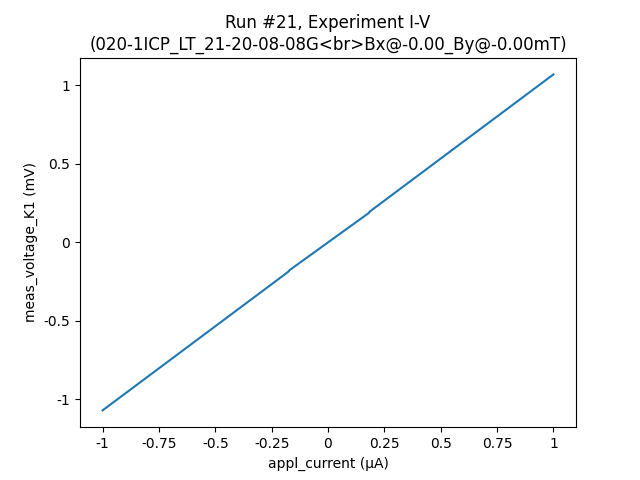

In [31]:
I_range=1e-6
K2440.output(1)
appl_current(-I_range) #Limit:1e-5 Amp(1MOhms risistor),1e-6 Amp(10MOhms risistor)
field_x = magnet_x.field()
field_y = magnet_y.field()

exp = qc.new_experiment('I-V', sample_name=f'020-1ICP_LT_21-20-08-08G<br>Bx@{field_x*1e3:.2f}_By@{field_y*1e3:.2f}mT')
dataid = do1d(appl_current, -I_range ,I_range, 1001, 0.05, meas_voltage_K1)
appl_current(0)
K2440.output(0)

plot_by_id(dataid)
# save_path = r"C:\Users\admin\SynologyDrive\00 Users\Albert\99_Samples\004_Shankar_MoTe2\020_tape2\020-1\ICP_LT\Plot\020-1ICP_LT_{}.png".format(dataid)  # Path to save the plot image
# autosave_plot_by_id(dataid, save_path)
# print(f"R = {get_R_from_IV(dataid)}")
# dataset = qc.load_by_id(dataid)
fig = IV(dataid)
# autosave_IV(fig, save_path = r"C:\Users\admin\SynologyDrive\00 Users\Albert\99_Samples\004_Shankar_MoTe2\020_tape2\020-1\ICP_LT\Plot\020-1ICP_LT_plotly_{}.png".format(dataid) )
plot_IV_and_dVdI2(dataid)

In [19]:
import pandas as pd

In [28]:
plot_IV_and_dVdI2(18)

Ic = 0.17800000000000002 µA
 Ir = -0.174 µA
 R_fit = 1071.727605909855 Ω
 IcRn = 190.7675138519542 µV
 R_fit0 = 1071.6685534093012 Ω
 R_fit1 = 1071.7866584104083 Ω
 R_fit_SC = 1035.955705087551 Ω
 Rn = 35.771900822303905 Ω



In [16]:
from scipy.signal import find_peaks
def find_peaks_and_plot(df, show_plot=True):
    current_0_index = df['appl_current'].abs().idxmin()

    # Find positive and negative peaks
    positive_peaks, _ = find_peaks(df['dV/dI'][df['appl_current'] > 0])
    negative_peaks, _ = find_peaks(df['dV/dI'][df['appl_current'] < 0])

    # Extract peak information
    positive_peak_current = [df['appl_current'].iloc[current_0_index + i+1] for i in positive_peaks]
    positive_peak_R = [df['dV/dI'].iloc[current_0_index + i+1] for i in positive_peaks]
    negative_peak_current = df['appl_current'].iloc[negative_peaks].values
    negative_peak_R = df['dV/dI'].iloc[negative_peaks].values

    # Find maximum peaks
    positive_peak_index = np.argmax(positive_peak_R)
    negative_peak_index = np.argmax(negative_peak_R)

    if show_plot:
        # Print peak information
        print("Positive peak:")
        print(f"  Current: {positive_peak_current[positive_peak_index]}")
        print(f"  dV/dI: {positive_peak_R[positive_peak_index]:.2f}")
        print("Negative peak:")
        print(f"  Current: {negative_peak_current[negative_peak_index]}")
        print(f"  dV/dI: {negative_peak_R[negative_peak_index]:.2f}")
        # Plot the data and peaks
        plt.plot(df['appl_current'], df['dV/dI'])
        plt.scatter(positive_peak_current, positive_peak_R, color='red', label='Positive Peak')
        plt.scatter(negative_peak_current, negative_peak_R, color='blue', label='Negative Peak')
        plt.legend()
        plt.show()
    else:
        return positive_peak_current[positive_peak_index], negative_peak_current[negative_peak_index]

def get_R_fit0(run_id):
    dataset = qc.load_by_id(run_id)
    df = dataset.to_pandas_dataframe().reset_index()
    para_list = dataset.parameters.split(",")
    run_id, exp_name, sample_name, sample_junction, name, description = get_detaset_info(
        dataset)
    df['dV/dI'] = pd.DataFrame(np.diff(df['meas_voltage_K1']) / np.diff(df['appl_current']), columns=['r']).reindex(df.index, method=None)
    peaks, _ = find_peaks(df['dV/dI'])
    # Extract peak current and peak differential voltage values
    peak_current = [df['appl_current'][i] for i in peaks]
    peak_R = [df['dV/dI'][i] for i in peaks]

    # Sort the peaks based on their values
    sorted_peak_indices = np.argsort(peak_R)[::-1]  # Sort in descending order
    top_two_peak_indices = sorted_peak_indices[:2]  # Select the top two indices

    # Extract the top two peaks
    top_two_peak_current = [peak_current[i] for i in top_two_peak_indices]
    top_two_peak_R = [peak_R[i] for i in top_two_peak_indices]
    # Ensure peak0 is less than paek1
    peak0, peak1 = top_two_peak_current
    if peak1 < peak0:
        peak0, peak1 = peak1, peak0
        top_two_peak_current = peak0, peak1
    df_0 = df[df['appl_current'] < peak0]
    df_1 = df[df['appl_current'] > peak1]

    fit_0 = np.polyfit(df_0['appl_current'], df_0['meas_voltage_K1'] , 1)
    fit_1 = np.polyfit(df_1['appl_current'], df_1['meas_voltage_K1'] , 1)
    R_fit0 = fit_0[0]
    R_fit1 = fit_1[0]
    R_fit = (R_fit0 + R_fit1) / 2
    current_0_index = df['appl_current'].abs().idxmin()
    Ic = top_two_peak_current[1]-df['appl_current'].iloc[current_0_index]
    IcRn = Ic*R_fit
    return R_fit, R_fit0 ,R_fit1, top_two_peak_current, Ic, IcRn, current_0_index

def get_R_fit(run_id):
    dataset = qc.load_by_id(run_id)
    df = dataset.to_pandas_dataframe().reset_index()
    para_list = dataset.parameters.split(",")
    run_id, exp_name, sample_name, sample_junction, name, description = get_detaset_info(
        dataset)
    df['dV/dI'] = pd.DataFrame(np.diff(df['meas_voltage_K1']) / np.diff(df['appl_current']), columns=['r']).reindex(df.index, method=None)
    Ic, Ir = find_peaks_and_plot(df, show_plot=False)
    df_0 = df[df['appl_current'] < Ir]
    df_1 = df[df['appl_current'] > Ic]
    fit_0 = np.polyfit(df_0['appl_current'], df_0['meas_voltage_K1'] , 1)
    fit_1 = np.polyfit(df_1['appl_current'], df_1['meas_voltage_K1'] , 1)
    R_fit0 = fit_0[0]
    R_fit1 = fit_1[0]
    R_fit = (R_fit0 + R_fit1) / 2
    current_0_index = df['appl_current'].abs().idxmin()
    IcRn = Ic*R_fit
    # Calculate the resistance between the peaks
    df_between_peaks = df[(df['appl_current'] > Ir) & (df['appl_current'] < Ic)]


    fit_between_peaks = np.polyfit(df_between_peaks['appl_current'], df_between_peaks['meas_voltage_K1'], 1)
    R_fit_between_peaks = fit_between_peaks[0]
    return R_fit, R_fit0 ,R_fit1, R_fit_between_peaks, Ic, Ir, IcRn, current_0_index, df


def plot_IV_and_dVdI(run_id=1):
    dataset = qc.load_by_id(run_id)
    run_id, exp_name, sample_name, sample_junction, name, description = get_detaset_info(dataset)
    df = dataset.to_pandas_dataframe().reset_index()
    df['dV/dI'] = pd.DataFrame(np.diff(df['meas_voltage_K1']) / np.diff(df['appl_current']), columns=['r']).reindex(df.index, method=None)
    para_list = dataset.parameters.split(",")
    R_fit, R_fit0 ,R_fit1, R_fit_between_peaks, Ic, Ir, IcRn, current_0_index, df = get_R_fit(run_id)
    # Create traces
    # Trace1 IV
    trace1 = go.Scatter(x=df['appl_current'], y=df['meas_voltage_K1'], mode='lines', name='IV')
    # Trace2 dV/dI
    trace2 = go.Scatter(x=df['appl_current'], y=df['dV/dI'], mode='lines', name='dV/dI', yaxis='y2')
    trace3 = go.Scatter(x=[Ir, Ir], y=[df['dV/dI'].min(), df['dV/dI'].max()], mode='lines', line=dict(dash='dash'), name='Peak0',yaxis='y2')
    trace4 = go.Scatter(x=[Ic, Ic], y=[df['dV/dI'].min(), df['dV/dI'].max()], mode='lines', line=dict(dash='dash'), name='Peak1',yaxis='y2')
    trace5 = go.Scatter(x=[df['appl_current'].iloc[current_0_index], df['appl_current'].iloc[current_0_index]], y=[df['dV/dI'].min(), df['dV/dI'].max()], mode='lines', line=dict(dash='dash'), name='I_0',yaxis='y2')
    trace6 = go.Scatter(x=[df['appl_current'].iloc[current_0_index], Ic], y=[0, 0], mode='lines', line=dict(dash='dash'), name='Ic')
    # Trace7 I_r
    trace7 = go.Scatter(x=[df['appl_current'].iloc[current_0_index], Ir], y=[0, 0], mode='lines', line=dict(dash='dash'), name='Ir')
    # Trace8 R_fit 
    trace8 = go.Scatter(x=[df['appl_current'].min(), df['appl_current'].max()], y=[R_fit*df['appl_current'].min(), R_fit*df['appl_current'].max()], mode='lines', line=dict(dash='dash'), name='R_fit') 
    
    # Create layout
    layout = go.Layout(
        title=f'<b>#{run_id} {exp_name} {sample_name}<br>R_fit={R_fit:.4f} Ω', 
        title_font=dict(size=25), title_x=0,
        xaxis=dict(title=para_list[0], tickfont=dict(size=16),title_font=dict(size=20)),
        yaxis=dict(title=f"{para_list[1]}", tickfont=dict(size=16),title_font=dict(size=20)),
        yaxis2=dict(title='dV/dI', tickfont=dict(size=16),title_font=dict(size=20), overlaying='y', side='right'),
        width=1000, height=1000, margin=dict(l=10, r=10, t=50, b=10),
        legend=dict(orientation="h",
                    x=0.5, y=1.03,
                    xanchor="center", yanchor="top",)
    )

    fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8], layout=layout)
    fig.update_layout(
        annotations=[
            go.layout.Annotation(
                x=1,
                y=1,
                xref="paper",
                yref="paper",
                text=f"Ic: {Ic*1e6:.3f}µA, Ir: {Ir*1e6:.3f}µA, IcRn: {IcRn*1e6:.3f}µV",
                showarrow=False,
                font=dict(
                    size=16,
                    color="#ffffff"
                ),
                align="right",
                bgcolor="#ff7f0e",
                opacity=0.8
            )
        ]
    )
    fig.show()
    print(f"Ic = {Ic*1e6} µA\n",
          f"Ir = {Ir*1e6} µA\n", 
          f"R_fit = {R_fit} Ω\n", 
          f"IcRn = {Ic*1e6*R_fit} µV\n",
          f"R_fit0 = {R_fit0} Ω\n", 
          f"R_fit1 = {R_fit1} Ω\n",
          f"R_fit_SC = {R_fit_between_peaks} Ω\n"
          f"Rn = {R_fit-R_fit_between_peaks} Ω\n"
          )
    return 

def get_R_fit_df(df):
    df = df.reset_index(drop=True)
    df['dV/dI'] = pd.DataFrame(np.diff(df['meas_voltage_K1']) / np.diff(df['appl_current']), columns=['r']).reindex(df.index, method=None)
    Ic, Ir = find_peaks_and_plot(df, show_plot=False)
    df_0 = df[df['appl_current'] < Ir]
    df_1 = df[df['appl_current'] > Ic]
    fit_0 = np.polyfit(df_0['appl_current'], df_0['meas_voltage_K1'] , 1)
    fit_1 = np.polyfit(df_1['appl_current'], df_1['meas_voltage_K1'] , 1)
    R_fit0 = fit_0[0]
    R_fit1 = fit_1[0]
    R_fit = (R_fit0 + R_fit1) / 2
    I0_idx = df['appl_current'].abs().idxmin()
    IcRn = Ic*R_fit
    # Calculate the resistance between the peaks
    df_between_peaks = df[(df['appl_current'] > Ir) & (df['appl_current'] < Ic)]


    fit_between_peaks = np.polyfit(df_between_peaks['appl_current'], df_between_peaks['meas_voltage_K1'], 1)
    R_fit_between_peaks = fit_between_peaks[0]

    return pd.Series({
        'R_fit': R_fit,
        'R_fit0': R_fit0,
        'R_fit1': R_fit1,
        'R_fit_SC': R_fit_between_peaks,
        'Ic': Ic,
        'Ir': Ir,
        'IcRn': IcRn,
    })

def merge_df(df):
    # 對 y_field 進行分組並應用計算函數
    results = df.groupby('y_field').apply(get_R_fit_df, include_groups=False).reset_index()

    # 將結果與原始數據合併
    df_merged = df.merge(results, on='y_field', how='left')
    return df_merged

def infer_shape_from_repeated_values(arr):
    # 初始化变量
    row_length = 0
    current_value = None
    current_count = 0
    
    # 遍历数组，寻找连续相同值的数量
    for value in arr:
        if value == current_value:
            current_count += 1
        else:
            if current_count > 0:
                if row_length == 0:
                    row_length = current_count
                elif row_length != current_count:
                    raise ValueError("数组中连续相同值的数量不一致，无法确定形状")
            current_value = value
            current_count = 1
    
    # 最后一个值的处理
    if current_count > 0:
        if row_length == 0:
            row_length = current_count
        elif row_length != current_count:
            raise ValueError("数组中连续相同值的数量不一致，无法确定形状")

    # 计算行数
    num_rows = len(arr) // row_length
    
    if len(arr) % row_length != 0:
        raise ValueError("数组长度无法整除推断出的行长度，无法确定形状")

    # 返回推断的形状
    return (num_rows, row_length)

In [47]:
import pandas as pd

In [74]:
dataset = qc.load_by_id(dataid)
plot_IV_and_dVdI(dataid)

Ic = 0.182 µA
 Ir = -0.174 µA
 R_fit = 1071.816866978892 Ω
 IcRn = 195.07066979015835 µV
 R_fit0 = 1071.8212928988269 Ω
 R_fit1 = 1071.812441058957 Ω
 R_fit_SC = 1036.0319252926934 Ω
Rn = 35.784941686198636 Ω



In [17]:
def plot_IV_and_dVdI2(run_id=1):
    dataset = qc.load_by_id(run_id)
    run_id, exp_name, sample_name, sample_junction, name, description = get_detaset_info(dataset)
    df = dataset.to_pandas_dataframe().reset_index()
    df['dV/dI'] = pd.DataFrame(np.diff(df['meas_voltage_K1']) / np.diff(df['appl_current']), columns=['r']).reindex(df.index, method=None)
    para_list = dataset.parameters.split(",")
    R_fit, R_fit0, R_fit1, R_fit_SC, Ic, Ir, IcRn, current_0_index, df = get_R_fit(run_id)
    
    # 计算修正后的电压值
    df['volt_correct'] = df['meas_voltage_K1'] - (R_fit_SC * df['appl_current'])
    
    # 创建 traces
    trace1 = go.Scatter(x=df['appl_current'], y=df['meas_voltage_K1'], mode='lines', name='IV')
    trace2 = go.Scatter(x=df['appl_current'], y=df['dV/dI'], mode='lines', name='dV/dI', yaxis='y2')
    trace3 = go.Scatter(x=[Ir, Ir], y=[df['dV/dI'].min(), df['dV/dI'].max()], mode='lines', line=dict(dash='dash'), name='Peak0', yaxis='y2')
    trace4 = go.Scatter(x=[Ic, Ic], y=[df['dV/dI'].min(), df['dV/dI'].max()], mode='lines', line=dict(dash='dash'), name='Peak1', yaxis='y2')
    trace5 = go.Scatter(x=[df['appl_current'].iloc[current_0_index], df['appl_current'].iloc[current_0_index]], y=[df['dV/dI'].min(), df['dV/dI'].max()], mode='lines', line=dict(dash='dash'), name='I_0', yaxis='y2')
    trace6 = go.Scatter(x=[df['appl_current'].iloc[current_0_index], Ic], y=[0, 0], mode='lines', line=dict(dash='dash'), name='Ic')
    trace7 = go.Scatter(x=[df['appl_current'].iloc[current_0_index], Ir], y=[0, 0], mode='lines', line=dict(dash='dash'), name='Ir')
    trace8 = go.Scatter(x=[df['appl_current'].min(), df['appl_current'].max()], y=[R_fit*df['appl_current'].min(), R_fit*df['appl_current'].max()], mode='lines', line=dict(dash='dash'), name='R_fit')
    
    # 新增的 trace 用于显示修正后的 IV 曲线
    trace9 = go.Scatter(x=df['appl_current'], y=df['volt_correct'], mode='lines', name='Corrected IV', line=dict(color='purple', width=2))
    
    # 创建布局
    layout = go.Layout(
        title=f'<b>#{run_id} {exp_name} {sample_name}<br>Rn_correct={R_fit-R_fit_SC:.4f} Ω', 
        title_font=dict(size=25), title_x=0,
        xaxis=dict(title=para_list[0], tickfont=dict(size=16),title_font=dict(size=20)),
        yaxis=dict(title=f"{para_list[1]}", tickfont=dict(size=16),title_font=dict(size=20)),
        yaxis2=dict(title='dV/dI', tickfont=dict(size=16),title_font=dict(size=20), overlaying='y', side='right'),
        width=1000, height=1000, margin=dict(l=10, r=10, t=50, b=10),
        legend=dict(orientation="h", x=0.5, y=1.03, xanchor="center", yanchor="top")
    )

    fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9], layout=layout)
    fig.update_layout(
        annotations=[
            go.layout.Annotation(
                x=1, y=1, xref="paper", yref="paper",
                text=f"Ic: {Ic*1e6:.3f}µA, Ir: {Ir*1e6:.3f}µA, IcRn: {IcRn*1e6:.3f}µV",
                showarrow=False, font=dict(size=16, color="#ffffff"),
                align="right", bgcolor="#ff7f0e", opacity=0.8
            )
        ]
    )
    fig.show()
    
    print(f"Ic = {Ic*1e6} µA\n",
          f"Ir = {Ir*1e6} µA\n", 
          f"R_fit = {R_fit} Ω\n", 
          f"IcRn = {Ic*1e6*R_fit} µV\n",
          f"R_fit0 = {R_fit0} Ω\n", 
          f"R_fit1 = {R_fit1} Ω\n",
          f"R_fit_SC = {R_fit_SC} Ω\n",
          f"Rn = {R_fit-R_fit_SC} Ω\n"
    )
    return

In [80]:
plot_IV_and_dVdI2(dataid)

Ic = 0.182 µA
 Ir = -0.174 µA
 R_fit = 1071.816866978892 Ω
 IcRn = 195.07066979015835 µV
 R_fit0 = 1071.8212928988269 Ω
 R_fit1 = 1071.812441058957 Ω
 R_fit_SC = 1036.0319252926934 Ω
 Rn = 35.784941686198636 Ω



In [ ]:
get_R_from_IV(dataid)

In [ ]:
dataset = qc.load_by_id(dataid)
get_R_from_IV(dataid)
IV(dataid)
IV_diff(dataid)

In [32]:
import plotly.graph_objs as go

In [ ]:
for i in tqdm(range(1000)):
    K2440.output(1)
    I_range=1e-6
    appl_current(-I_range) #Limit:1e-5 Amp(1MOhms risistor),1e-6 Amp(10MOhms risistor)
    sleep(0.001)
    # station.snapshot(update=True);
    exp = qc.new_experiment('I-V', sample_name=f'103-03_J1_33-32-30-31_1M_F{i+1}')
    dataid = do1d(appl_current, -I_range ,I_range, 101, 0.0001, meas_voltage_K1, meas_voltage_AC_L1,meas_voltage_AC_L1_P)
    exp = qc.new_experiment('I-V', sample_name=f'103-03_J1_33-32-30-31_1M_B{i+1}')
    dataid = do1d(appl_current, I_range ,-I_range, 101, 0.0001, meas_voltage_K1)
    K2440.output(0)
    clear_output(True)

In [ ]:
get_Mag()

In [ ]:
SGS.off()

In [ ]:
SGS.power(0)

In [ ]:
DMM6500.averaging_count(5)
DMM6500.averaging_enabled(True)

In [ ]:
for i in tqdm(range(21)):
    I_range = round(round(0.55 + 5*i * 1e-4, 6)* 1e-6, 10)  # Round to 3 decimal places
    print(I_range)


In [ ]:
for i in tqdm(range(21)):
    K2440.output(1)
    I_range = round(round(0.55 + 5*i * 1e-4, 6)* 1e-6, 10) 
    appl_current(-I_range) #Limit:1e-5 Amp(1MOhms risistor),1e-6 Amp(10MOhms risistor)
    sleep(2)
    # station.snapshot(update=True);
    exp = qc.new_experiment('I-V', sample_name=f'103-04_J1_24-25-05-04(06-07G)_1M_By@0mT_{-I_range}')
    dataid = do1d(appl_current, -I_range ,I_range, 201, 0.00001, meas_voltage_K1)

    appl_current(0)
    K2440.output(0)


    plot_by_id(dataid)
    save_path = r"D:\data\Albert\103\Plot\104_{}.png".format(dataid)  # Path to save the plot image
    autosave_plot_by_id(dataid, save_path)
    print(f"ID:{dataid}")
    print(f"R = {get_R_from_IV_2(dataid)}")
    dataset = qc.load_by_id(dataid)
    IV(id=dataid)
    IV_diff(id=dataid)

In [ ]:
DMM6500.averaging_count(5)
DMM6500.averaging_enabled(True)

In [ ]:
K2440.output(1)
I_range = -1e-6
appl_current(-I_range) #Limit:1e-5 Amp(1MOhms risistor),1e-6 Amp(10MOhms risistor)
sleep(2)
Bx = magnet_x.field()
By = magnet_y.field()
exp = qc.new_experiment('I-V', sample_name=f'020-1ICP_LT21-20-08-08G_1M_{By=}@mT{-I_range}')
dataid = do1d(appl_current, -I_range  ,I_range , 2601, 0.00001, meas_voltage_K1)
appl_current(0)
K2440.output(0)
plot_by_id(dataid)
save_path = r"D:\data\Albert\103\Plot\104_{}.png".format(dataid)  # Path to save the plot image
autosave_plot_by_id(dataid, save_path)
print(f"R = {get_R_from_IV_2(dataid)}")
dataset = qc.load_by_id(dataid)

In [ ]:
K2440.output(1)
I_range = 6e-6
appl_current(-I_range) #Limit:1e-5 Amp(1MOhms risistor),1e-6 Amp(10MOhms risistor)
sleep(2)
# station.snapshot(update=True);
exp = qc.new_experiment('I-V', sample_name=f'103-03_J2_27-26-30-31M(32G-33G-28G-29G)_1M_By@0.1mT{-I_range}')
dataid = do1d(appl_current, -I_range  ,I_range , 2601, 0.00001, meas_voltage_K1)
appl_current(0)
K2440.output(0)
plot_by_id(dataid)
save_path = r"D:\data\Albert\103\Plot\104_{}.png".format(dataid)  # Path to save the plot image
autosave_plot_by_id(dataid, save_path)
print(f"ID:{dataid}")
print(f"R = {get_R_from_IV_2(dataid)}")
dataset = qc.load_by_id(dataid)
# IV(id=dataid)
# IV_diff(id=dataid)

In [ ]:
25-05-06-07(04-24G)


In [ ]:
K2440.output(1)
I_range=-7e-6
appl_current(-I_range) #Limit:1e-5 Amp(1MOhms risistor),1e-6 Amp(10MOhms risistor)
sleep(2)
# station.snapshot(update=True);
exp = qc.new_experiment('I-V', sample_name='103-03_J2_32-30-26-27_1M_By@0mT')
dataid = do1d(appl_current, -I_range ,I_range, 1401, 0.0001, meas_voltage_K1)

appl_current(0)
K2440.output(0)


plot_by_id(dataid)
save_path = r"D:\data\Albert\103\Plot\104_{}.png".format(dataid)  # Path to save the plot image
autosave_plot_by_id(dataid, save_path)
print(f"ID:{dataid}")
print(f"R = {get_R_from_IV_2(dataid)}")
dataset = qc.load_by_id(dataid)
IV(id=dataid)
IV_diff(id=dataid)

In [ ]:
K2440.output(1)
I_range=7e-6
appl_current(-I_range) #Limit:1e-5 Amp(1MOhms risistor),1e-6 Amp(10MOhms risistor)
sleep(2)
# station.snapshot(update=True);
exp = qc.new_experiment('I-V', sample_name='103-03_J2_32-30-26-27_1M_By@0mT')
dataid = do1d(appl_current, -I_range ,I_range, 1401, 0.0001, meas_voltage_K1)

appl_current(0)
K2440.output(0)


plot_by_id(dataid)
save_path = r"D:\data\Albert\103\Plot\104_{}.png".format(dataid)  # Path to save the plot image
autosave_plot_by_id(dataid, save_path)
print(f"ID:{dataid}")
print(f"R = {get_R_from_IV_2(dataid)}")
dataset = qc.load_by_id(dataid)
IV(id=dataid)
IV_diff(id=dataid)

In [ ]:
# Set current to 0
K2440.output(0)
appl_current(0e-6)

In [ ]:
K2440.output(1)
appl_current(0.1e-7)

In [ ]:
runid=6
print(get_R_from_IV_2(runid))

## 加TG (1D)

In [ ]:
K2440.output(1)
appl_TG(0)

In [ ]:
K2440.output(1)
K2440.output(1)
appl_TG(-50)
sleep(3)
appl_current(-1.5e-8)
sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV', sample_name='TG21')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -1.5e-8 ,1.5e-8, 101, 0.05, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

K2440.output(0)
K2440.output(0)
appl_current(0)
plot_by_id(dataid)
#print(get_R_from_IV(dataid))
# print(get_R_from_IV_2(dataid))


## 歸零


In [ ]:
#K2440.output(1)
K2440.output(1)

appl_current(0)
sleep(1)
#appl_TG(0)
sleep(5)

#K2440.output(0)
K2440.output(0)

# Magnetic field

## IV vs Bx

In [ ]:
K2440.rangev()

In [ ]:
K2440.volt(0)
K2440.output(1) #output off
sleep(1)
appl_current(1.5e-7)
sleep(2)
meas_voltage_K1()

In [72]:
appl_current(0e-7)

In [ ]:
sleep(120)

In [ ]:
def get_Mag(show=True):
    Mag_x = magnet_x.field()
    Mag_y = magnet_y.field()
    Mag_z = magnet_z.field()
    if show:
        print(f"Mag_x: {Mag_x*1e3:.6f} mT")
        print(f"Mag_y: {Mag_y*1e3:.6f} mT")
        print(f"Mag_z: {Mag_z*1e3:.6f} mT")
    else: 
        return Mag_x, Mag_y, Mag_z
get_Mag()

In [ ]:
get_Mag()

In [ ]:
magnet_y.field()

In [ ]:
for i in tqdm(range(23), desc="First loop"):
    value = (25 - i) * 1e-3 
    value = float(f"{value:.10f}")
    print(value)

In [ ]:
from tqdm import tqdm
import time

from IPython.display import clear_output
# First loop
for i in tqdm(range(6), desc="First loop"):
    Mag_x = magnet_x.field()
    value = (15 + i) * 1e-3
    value = float(f"{value:.10f}")
    magnet_x.field(value)
    print(f"magnet_x is {Mag_x:.8f} T")
    time.sleep(15)
    clear_output(True)

# Pause for 30 seconds
time.sleep(60)

# Second loop
for i in tqdm(range(23), desc="First loop"):
    Mag_x = magnet_x.field()
    value = (25 - i) * 1e-3 
    value = float(f"{value:.10f}")
    magnet_x.field(value)
    print(f"magnet_x is {Mag_x:.8f} T")
    time.sleep(15)
    clear_output(True)

# Pause for 180 seconds
time.sleep(300)

In [ ]:
magnet_x.field(-20)

In [67]:
magnet_y.field(0)

In [63]:
Mag = 3e-3
I_range=0.5e-6
K2440.output(1)
sleep(180)
# magnet_x.field(Mag)
Bx = magnet_x.field()
By = magnet_y.field()
appl_current(-I_range)
sleep(3)
direction = '-' if Mag > 0 else '+'
exp = qc.new_experiment('IVBx', sample_name=f'020-1ICP_LT_{direction}Bx_{By=}mT')
dataid = do2d(magnet_x.field, Mag, -Mag, 601 , 0.5, appl_current, -I_range ,I_range, 201, 0.05, meas_voltage_K1)
appl_current(0)
K2440.output(0)


plot_by_id(dataid)
# autosave_plot_by_id(dataid, save_path)

Starting experimental run with id: 24. 


first parameter:  53%|█████▎    | 317/601 [1:35:09<1:25:15, 18.01s/it]
An exception occured in measurement with guid: 4aa57563-0000-0000-0000-0191f479067c;
Traceback:
Traceback (most recent call last):
  File "c:\Users\admin\Documents\GitHub\QCoDeS_local\sweeps_v2.py", line 49, in do2d
    param_set2.set(set_point2)
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\qcodes\parameters\parameter_base.py", line 632, in set_wrapper
    time.sleep(self.post_delay - t_elapsed)
KeyboardInterrupt



KeyboardInterrupt: 

Trying to mark a run completed that was already completed.


([<AxesSubplot:title={'center':'Run #23, Experiment IVBx (020-1ICP_LT_-Bx_By=0.0mT)'}, xlabel='field (mT)', ylabel='appl_current (μA)'>],
 [<matplotlib.colorbar.Colorbar at 0x2324e769af0>])

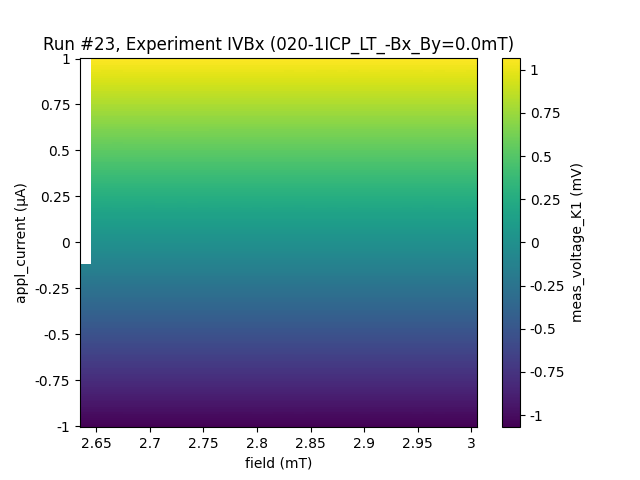

In [70]:
plot_by_id(23)

In [71]:
dataset = qc.load_by_id(23)
run_id, exp_name, sample_name, sample_junction, name, description = get_detaset_info(dataset)
df = dataset.to_pandas_dataframe().reset_index()
para_list = dataset.parameters.split(",")
para_list
df['dV/dI'] = pd.DataFrame(np.diff(df['meas_voltage_K1']) / np.diff(df['appl_current']), columns=['r']).reindex(df.index, method=None)
df['volt_correct'] = df['meas_voltage_K1'] - (R_fit_SC * df['appl_current'])

fig = go.Figure(data=go.Heatmap(
        x=df['x_field']*1e3,
        y=df['appl_current'],
        # z=df['volt_correct'],
        z=df['dV/dI'],
        colorscale='RdBu',
        colorbar=dict(
            title='dV/dI', titleside='top')),
        layout=dict(
            title=f"#{run_id} dV/dI {sample_name}",
            xaxis_title=f"{para_list[0]}(mT)",
            yaxis_title=para_list[1],
            height=800, width=800))
fig.show()

In [56]:
dataset = qc.load_by_id(dataid)
run_id, exp_name, sample_name, sample_junction, name, description = get_detaset_info(dataset)
df = dataset.to_pandas_dataframe().reset_index()
para_list = dataset.parameters.split(",")
para_list
df['dV/dI'] = pd.DataFrame(np.diff(df['meas_voltage_K1']) / np.diff(df['appl_current']), columns=['r']).reindex(df.index, method=None)
df['volt_correct'] = df['meas_voltage_K1'] - (R_fit_SC * df['appl_current'])

fig = go.Figure(data=go.Heatmap(
        x=df['x_field']*1e3,
        y=df['appl_current'],
        # z=df['volt_correct'],
        z=df['dV/dI'],
        colorscale='RdBu',
        colorbar=dict(
            title='dV/dI', titleside='top')),
        layout=dict(
            title=f"#{run_id} dV/dI {sample_name}",
            xaxis_title=f"{para_list[0]}(mT)",
            yaxis_title=para_list[1],
            height=800, width=800))
fig.show()

In [60]:
dataset = qc.load_by_id(dataid)
run_id, exp_name, sample_name, sample_junction, name, description = get_detaset_info(dataset)
df = dataset.to_pandas_dataframe().reset_index()
para_list = dataset.parameters.split(",")
df['dV/dI'] = pd.DataFrame(np.diff(df['meas_voltage_K1']) / np.diff(df['appl_current']), columns=['r']).reindex(df.index, method=None)
df['volt_correct'] = df['meas_voltage_K1'] - (R_fit_SC * df['appl_current'])

# 计算 dV/dI 的绝对值范围
z_abs_max = max(abs(df['dV/dI'].min()), abs(df['dV/dI'].max()))

fig = go.Figure(data=go.Heatmap(
        x=df['x_field']*1e3,
        y=df['appl_current'],
        z=df['dV/dI'],
        colorscale='RdBu',
        zmin=-z_abs_max,
        zmax=z_abs_max,
        colorbar=dict(
            title='dV/dI',
            titleside='top',
            tickmode='auto',
            # 使用 type='log' 来设置对数刻度
            type='log'
        )),
        layout=dict(
            title=f"#{run_id} dV/dI {sample_name}",
            xaxis_title=f"{para_list[0]}(mT)",
            yaxis_title=para_list[1],
            height=800, width=800))

# 添加悬停信息
fig.update_traces(
    hovertemplate='Magnetic Field: %{x:.2f} mT<br>Current: %{y:.2e} A<br>dV/dI: %{z:.2e}'
)

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.heatmap.ColorBar: 'type'

Did you mean "title"?

    Valid properties:
        bgcolor
            Sets the color of padded area.
        bordercolor
            Sets the axis line color.
        borderwidth
            Sets the width (in px) or the border enclosing this
            color bar.
        dtick
            Sets the step in-between ticks on this axis. Use with
            `tick0`. Must be a positive number, or special strings
            available to "log" and "date" axes. If the axis `type`
            is "log", then ticks are set every 10^(n*dtick) where n
            is the tick number. For example, to set a tick mark at
            1, 10, 100, 1000, ... set dtick to 1. To set tick marks
            at 1, 100, 10000, ... set dtick to 2. To set tick marks
            at 1, 5, 25, 125, 625, 3125, ... set dtick to
            log_10(5), or 0.69897000433. "log" has several special
            values; "L<f>", where `f` is a positive number, gives
            ticks linearly spaced in value (but not position). For
            example `tick0` = 0.1, `dtick` = "L0.5" will put ticks
            at 0.1, 0.6, 1.1, 1.6 etc. To show powers of 10 plus
            small digits between, use "D1" (all digits) or "D2"
            (only 2 and 5). `tick0` is ignored for "D1" and "D2".
            If the axis `type` is "date", then you must convert the
            time to milliseconds. For example, to set the interval
            between ticks to one day, set `dtick` to 86400000.0.
            "date" also has special values "M<n>" gives ticks
            spaced by a number of months. `n` must be a positive
            integer. To set ticks on the 15th of every third month,
            set `tick0` to "2000-01-15" and `dtick` to "M3". To set
            ticks every 4 years, set `dtick` to "M48"
        exponentformat
            Determines a formatting rule for the tick exponents.
            For example, consider the number 1,000,000,000. If
            "none", it appears as 1,000,000,000. If "e", 1e+9. If
            "E", 1E+9. If "power", 1x10^9 (with 9 in a super
            script). If "SI", 1G. If "B", 1B.
        labelalias
            Replacement text for specific tick or hover labels. For
            example using {US: 'USA', CA: 'Canada'} changes US to
            USA and CA to Canada. The labels we would have shown
            must match the keys exactly, after adding any
            tickprefix or ticksuffix. For negative numbers the
            minus sign symbol used (U+2212) is wider than the
            regular ascii dash. That means you need to use −1
            instead of -1. labelalias can be used with any axis
            type, and both keys (if needed) and values (if desired)
            can include html-like tags or MathJax.
        len
            Sets the length of the color bar This measure excludes
            the padding of both ends. That is, the color bar length
            is this length minus the padding on both ends.
        lenmode
            Determines whether this color bar's length (i.e. the
            measure in the color variation direction) is set in
            units of plot "fraction" or in *pixels. Use `len` to
            set the value.
        minexponent
            Hide SI prefix for 10^n if |n| is below this number.
            This only has an effect when `tickformat` is "SI" or
            "B".
        nticks
            Specifies the maximum number of ticks for the
            particular axis. The actual number of ticks will be
            chosen automatically to be less than or equal to
            `nticks`. Has an effect only if `tickmode` is set to
            "auto".
        orientation
            Sets the orientation of the colorbar.
        outlinecolor
            Sets the axis line color.
        outlinewidth
            Sets the width (in px) of the axis line.
        separatethousands
            If "true", even 4-digit integers are separated
        showexponent
            If "all", all exponents are shown besides their
            significands. If "first", only the exponent of the
            first tick is shown. If "last", only the exponent of
            the last tick is shown. If "none", no exponents appear.
        showticklabels
            Determines whether or not the tick labels are drawn.
        showtickprefix
            If "all", all tick labels are displayed with a prefix.
            If "first", only the first tick is displayed with a
            prefix. If "last", only the last tick is displayed with
            a suffix. If "none", tick prefixes are hidden.
        showticksuffix
            Same as `showtickprefix` but for tick suffixes.
        thickness
            Sets the thickness of the color bar This measure
            excludes the size of the padding, ticks and labels.
        thicknessmode
            Determines whether this color bar's thickness (i.e. the
            measure in the constant color direction) is set in
            units of plot "fraction" or in "pixels". Use
            `thickness` to set the value.
        tick0
            Sets the placement of the first tick on this axis. Use
            with `dtick`. If the axis `type` is "log", then you
            must take the log of your starting tick (e.g. to set
            the starting tick to 100, set the `tick0` to 2) except
            when `dtick`=*L<f>* (see `dtick` for more info). If the
            axis `type` is "date", it should be a date string, like
            date data. If the axis `type` is "category", it should
            be a number, using the scale where each category is
            assigned a serial number from zero in the order it
            appears.
        tickangle
            Sets the angle of the tick labels with respect to the
            horizontal. For example, a `tickangle` of -90 draws the
            tick labels vertically.
        tickcolor
            Sets the tick color.
        tickfont
            Sets the color bar's tick label font
        tickformat
            Sets the tick label formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display "09~15~23.46"
        tickformatstops
            A tuple of :class:`plotly.graph_objects.heatmap.colorba
            r.Tickformatstop` instances or dicts with compatible
            properties
        tickformatstopdefaults
            When used in a template (as layout.template.data.heatma
            p.colorbar.tickformatstopdefaults), sets the default
            property values to use for elements of
            heatmap.colorbar.tickformatstops
        ticklabeloverflow
            Determines how we handle tick labels that would
            overflow either the graph div or the domain of the
            axis. The default value for inside tick labels is *hide
            past domain*. In other cases the default is *hide past
            div*.
        ticklabelposition
            Determines where tick labels are drawn relative to the
            ticks. Left and right options are used when
            `orientation` is "h", top and bottom when `orientation`
            is "v".
        ticklabelstep
            Sets the spacing between tick labels as compared to the
            spacing between ticks. A value of 1 (default) means
            each tick gets a label. A value of 2 means shows every
            2nd label. A larger value n means only every nth tick
            is labeled. `tick0` determines which labels are shown.
            Not implemented for axes with `type` "log" or
            "multicategory", or when `tickmode` is "array".
        ticklen
            Sets the tick length (in px).
        tickmode
            Sets the tick mode for this axis. If "auto", the number
            of ticks is set via `nticks`. If "linear", the
            placement of the ticks is determined by a starting
            position `tick0` and a tick step `dtick` ("linear" is
            the default value if `tick0` and `dtick` are provided).
            If "array", the placement of the ticks is set via
            `tickvals` and the tick text is `ticktext`. ("array" is
            the default value if `tickvals` is provided).
        tickprefix
            Sets a tick label prefix.
        ticks
            Determines whether ticks are drawn or not. If "", this
            axis' ticks are not drawn. If "outside" ("inside"),
            this axis' are drawn outside (inside) the axis lines.
        ticksuffix
            Sets a tick label suffix.
        ticktext
            Sets the text displayed at the ticks position via
            `tickvals`. Only has an effect if `tickmode` is set to
            "array". Used with `tickvals`.
        ticktextsrc
            Sets the source reference on Chart Studio Cloud for
            `ticktext`.
        tickvals
            Sets the values at which ticks on this axis appear.
            Only has an effect if `tickmode` is set to "array".
            Used with `ticktext`.
        tickvalssrc
            Sets the source reference on Chart Studio Cloud for
            `tickvals`.
        tickwidth
            Sets the tick width (in px).
        title
            :class:`plotly.graph_objects.heatmap.colorbar.Title`
            instance or dict with compatible properties
        titlefont
            Deprecated: Please use heatmap.colorbar.title.font
            instead. Sets this color bar's title font. Note that
            the title's font used to be set by the now deprecated
            `titlefont` attribute.
        titleside
            Deprecated: Please use heatmap.colorbar.title.side
            instead. Determines the location of color bar's title
            with respect to the color bar. Defaults to "top" when
            `orientation` if "v" and  defaults to "right" when
            `orientation` if "h". Note that the title's location
            used to be set by the now deprecated `titleside`
            attribute.
        x
            Sets the x position with respect to `xref` of the color
            bar (in plot fraction). When `xref` is "paper",
            defaults to 1.02 when `orientation` is "v" and 0.5 when
            `orientation` is "h". When `xref` is "container",
            defaults to 1 when `orientation` is "v" and 0.5 when
            `orientation` is "h". Must be between 0 and 1 if `xref`
            is "container" and between "-2" and 3 if `xref` is
            "paper".
        xanchor
            Sets this color bar's horizontal position anchor. This
            anchor binds the `x` position to the "left", "center"
            or "right" of the color bar. Defaults to "left" when
            `orientation` is "v" and "center" when `orientation` is
            "h".
        xpad
            Sets the amount of padding (in px) along the x
            direction.
        xref
            Sets the container `x` refers to. "container" spans the
            entire `width` of the plot. "paper" refers to the width
            of the plotting area only.
        y
            Sets the y position with respect to `yref` of the color
            bar (in plot fraction). When `yref` is "paper",
            defaults to 0.5 when `orientation` is "v" and 1.02 when
            `orientation` is "h". When `yref` is "container",
            defaults to 0.5 when `orientation` is "v" and 1 when
            `orientation` is "h". Must be between 0 and 1 if `yref`
            is "container" and between "-2" and 3 if `yref` is
            "paper".
        yanchor
            Sets this color bar's vertical position anchor This
            anchor binds the `y` position to the "top", "middle" or
            "bottom" of the color bar. Defaults to "middle" when
            `orientation` is "v" and "bottom" when `orientation` is
            "h".
        ypad
            Sets the amount of padding (in px) along the y
            direction.
        yref
            Sets the container `y` refers to. "container" spans the
            entire `height` of the plot. "paper" refers to the
            height of the plotting area only.
        
Did you mean "title"?

Bad property path:
type
^^^^

In [47]:
# R_fit_SC = 1035.955705087551
R_fit_SC = 1060

In [ ]:
def IV_Mag_plot(run_id):
    # Load the dataset
    dataset = qc.load_by_id(run_id)
    # Get the dataset info
    run_id, exp_name, sample_name, sample_junction, name, description = get_detaset_info(
        dataset)
    df = dataset.to_pandas_dataframe().reset_index()
    # Plot the dataset
    plot_dataset(dataset)
    para_list = dataset.parameters.split(",")
    df['dV/dI'] = pd.DataFrame(np.diff(df['meas_voltage_K1']) / np.diff(df['appl_current']), columns=['r']).reindex(df.index, method=None)
    df['volt_correct'] = df['meas_voltage_K1'] - (R_fit_SC * df['appl_current'])


    fig = go.Figure(data=go.Heatmap(
        x=df['appl_current'],
        y=df['x_field'],
        z=df['volt_correct'],
        colorscale='RdBu',
        colorbar=dict(
            title='dV/dI', titleside='top')),
        layout=dict(
            title=f"#{run_id} dV/dI {sample_name}",
            xaxis_title=para_list[0],
            yaxis_title=para_list[1],
            height=800, width=800
    ))

    fig1 = go.Figure(data=go.Heatmap(
        x=df[para_list[0]]*1e-9,
        y=df[para_list[1]]*1e6,
        z=df[para_list[2]]*1e3,
        colorscale='RdBu',
        colorbar=dict(
            title="Voltage(mV)", titleside='top')),
        layout=dict(
            title=f"#{run_id} JJ2 IV-F RF Power@20dBm, B_y@0.1mT",
            xaxis_title="RF Frequency (GHz)",
            yaxis_title="Current (μA)",
            height=720, width=2560,
            margin=dict(l=10, r=10, t=50, b=10)

    ))
    # fig1.show()

    fig2 = go.Figure(data=go.Heatmap(
        x=df[para_list[0]],
        y=df[para_list[1]],
        z=df['dV/dI'],
        colorscale='RdBu',
        colorbar=dict(
            title='dV/dI', titleside='top')),
        layout=dict(
            title=f"#{run_id} dV/dI {sample_name}",
            xaxis_title=para_list[0],
            yaxis_title=para_list[1],
            height=800, width=800
    ))

    fig3 = go.Figure(data=go.Heatmap(
        x=df[para_list[0]],
        y=df['volt_correct'],
        z=df['dV/dI'],
        colorscale='RdBu',
        colorbar=dict(
            title='dV/dI', titleside='top')),
        layout=dict(
            title=f"#{run_id} dV/dI {sample_name}",
            xaxis_title=para_list[0],
            yaxis_title=para_list[1],
            height=800, width=800
    ))

In [ ]:
K2440.output(1)
sleep(2)
Mag = 10e-3
I_range=2.5e-5

magnet_x.field(Mag)
sleep(30)
appl_current(-I_range)
sleep(3)
direction = 'backward' if Mag > 0 else 'forward'


# station.snapshot(update=True);

exp = qc.new_experiment('IV vs Bx', sample_name=f'094-20IV_Bx_16-17-19-18_10M_{direction}')

dataid = do2d(magnet_x.field, Mag, -Mag, 101 , 1.5, appl_current, -I_range ,I_range, 101, 0.05, meas_voltage_K1)#M:I Delay time 10:1


appl_current(0)
K2440.output(0)
# magnet_x.field(0)

plot_by_id(dataid)
autosave_plot_by_id(dataid, save_path)

In [ ]:
set_magnetic_field_stepwise(magnet=magnet_x, current_field=-40e-3, target_field=-18e-3, step_size=1e-3, delay=2.5)

In [ ]:
def set_magnetic_field_stepwise(magnet=magnet_x, current_field=0, target_field=-10e-3, step_size=1e-3, delay=2.5):
    
    """Set the magnetic field with anti-hysteresis mechanism witch will go to target magnetic field +/- 5mT, 
    if the target magnetic field is greater/less than the current magnetic field, 
    then slowly ramp back the magnetic field to the target magnetic field

    Args:
        magnet (_type_, optional): magnet_x,magnet_y,magnet_z. Defaults to magnet_x.
        current_field (int, optional): _description_. Defaults to 0 T.
        target_field (_type_, optional): _description_. Defaults to -10e-3 T.
        step_size (_type_, optional): _description_. Defaults to 1e-3 T.
        delay (float, optional): _description_. Defaults to 2 sec.
    
    """
    
    from tqdm.notebook import tqdm
    import math
    # Calculate total steps for tqdm progress bar
    total_steps = math.ceil(abs((target_field - current_field) / step_size)) * 2
    progress_bar = tqdm(total=total_steps)

    # Determine the intermediate target field
    intermediate_target_field = target_field + 5e-3 if target_field > current_field else target_field - 5e-3
    # Slowly ramp the magnetic field to the intermediate target field
    while abs(intermediate_target_field - current_field) > step_size:
        if intermediate_target_field > current_field:
            current_field += step_size
            magnet.field(current_field)
        else:
            current_field -= step_size
            magnet.field(current_field)
        time.sleep(delay)
        progress_bar.update(1)  # Update progress bar
    # Slowly ramp back the magnetic field to the target_field
    while abs(target_field - current_field) > step_size:
        if target_field > current_field:
            current_field += step_size
            magnet.field(current_field)
        else:
            current_field -= step_size
            magnet.field(current_field)
        time.sleep(delay)
        progress_bar.update(1)  # Update progress bar
    magnet.field(target_field)
    progress_bar.n = total_steps  # Set progress bar to 100%
    progress_bar.refresh()  # Refresh the progress bar to show the update
    progress_bar.close()  # Close progress bar when done

In [ ]:
for i in range(6):
    magnet_x.field((-10-i)*1e-3)
    sleep(4)
sleep(10)

for i in range(16):
    magnet_x.field((15+i)*1e-3)
    sleep(4)
sleep(10)

In [ ]:
for i in range(25):
    print(-24+i)

In [ ]:
magnet_x.field(-19e-3)
sleep(10)
#magnet_x.field(e-3)
#sleep(10)
#magnet_x.field(12.8e-3)
#sleep(10)

## IV vs By

In [ ]:
get_Mag()

In [ ]:
magnet_y.field(0e-3)

In [ ]:
for i in tqdm(range(21), desc="2nd loop"):
    
    value = (-10 + i*0.5) * 1e-3 
    value = float(f"{value:.10f}")
    magnet_y.field(value)
    get_Mag()
    time.sleep(15)
    clear_output(True)

In [ ]:

# First loop
for i in tqdm(range(11), desc="First loop"):
    
    value = (5 +i) * 1e-3
    value = float(f"{value:.10f}")
    magnet_y.field(value)
    get_Mag()
    time.sleep(15)
    clear_output(True)

# Pause for 30 seconds
time.sleep(60)

# Second loop
for i in tqdm(range(11), desc="2nd loop"):
    
    value = (-10 + i) * 1e-3 
    value = float(f"{value:.10f}")
    magnet_y.field(value)
    get_Mag()
    time.sleep(15)
    clear_output(True)
# Pause for 180 seconds
time.sleep(300)

In [ ]:
magnet_y.field()

In [ ]:
Mag =5e-3
I_range=0.6e-6
K2440.output(1)
sleep(2)
magnet_y.field(Mag)
sleep(10)
appl_current(-I_range)
sleep(3)
direction = 'backward' if Mag > 0 else 'forward'


# station.snapshot(update=True);
exp = qc.new_experiment('IV vs By', sample_name=f'103-03_J2_27-26-30-31M(32G-33G-28G-29G)_1M_By_{direction}_{-I_range}')

dataid = do2d(magnet_y.field, Mag, -Mag, 201 , 0.5, appl_current, -I_range ,I_range,  201, 0.0001, meas_voltage_K1)

appl_current(0)
K2440.output(0)
# magnet_y.field(0)

plot_by_id(dataid)
autosave_plot_by_id(dataid, save_path)

In [ ]:
Mag =-5e-3
I_range=5e-6
K2440.output(1)
sleep(2)
magnet_y.field(Mag)
sleep(10)
appl_current(-I_range)
sleep(3)
direction = 'backward' if Mag > 0 else 'forward'


# station.snapshot(update=True);
exp = qc.new_experiment('IV vs By', sample_name=f'103-03_J2_27-26-30-31M(32G-33G-28G-29G)_1M_By_{direction}_{-I_range}')

dataid = do2d(magnet_y.field, Mag, -Mag, 201 , 0.5, appl_current, -I_range ,I_range,  201, 0.0001, meas_voltage_K1)

appl_current(0)
K2440.output(0)
# magnet_y.field(0)

plot_by_id(dataid)
autosave_plot_by_id(dataid, save_path)

In [ ]:
32-

In [ ]:

# First loop
for i in tqdm(range(6), desc="First loop"):
    Mag_x = magnet_y.field()
    value = (1.5 +i) * 1e-3
    value = float(f"{value:.10f}")
    magnet_y.field(value)
    print(f"magnet_y is {Mag_x:.8f} T")
    time.sleep(15)
    clear_output(True)

# Pause for 30 seconds
time.sleep(60)

# Second loop
for i in tqdm(range(6), desc="2nd loop"):
    Mag_x = magnet_y.field()
    value = (6.5 - i) * 1e-3 
    value = float(f"{value:.10f}")
    magnet_y.field(value)
    print(f"magnet_y is {Mag_x:.8f} T")
    time.sleep(15)
    clear_output(True)

# Pause for 180 seconds
time.sleep(300)

In [ ]:
Mag = 1.5e-3
I_range=2.5e-6
K2440.output(1)
sleep(2)
magnet_y.field(Mag)
sleep(10)
appl_current(-I_range)
sleep(3)
direction = 'backward' if Mag > 0 else 'forward'


# station.snapshot(update=True);
exp = qc.new_experiment('IV vs By', sample_name=f'103-06_J2_12-13-18-19_1M_By_{direction}_Bx@3mT')

dataid = do2d(magnet_y.field, Mag, -Mag, 1001 , 0.4, appl_current, -I_range ,I_range, 151, 0.01, meas_voltage_K1)

appl_current(0)
K2440.output(0)
# magnet_y.field(0)

plot_by_id(dataid)
autosave_plot_by_id(dataid, save_path)

In [ ]:
Mag()

In [ ]:
Mag = 1.5e-3
I_range=1e-6
K2440.output(1)
sleep(2)
magnet_y.field(Mag)
sleep(10)
appl_current(-I_range)
sleep(3)
direction = 'backward' if Mag > 0 else 'forward'


# station.snapshot(update=True);
exp = qc.new_experiment('IV vs By', sample_name=f'103-01_J1_21-20-23-22_1M_By_{direction}_Bx@0mT')

dataid = do2d(magnet_y.field, Mag, -Mag, 151 , 0.9, appl_current, -I_range ,I_range, 201, 0.01, meas_voltage_K1)

appl_current(0)
K2440.output(0)
# magnet_y.field(0)

plot_by_id(dataid)
autosave_plot_by_id(dataid, save_path)

In [ ]:
from tqdm import tqdm
import time

# First loop
for i in tqdm(range(6), desc="First loop"):
    value = (1.5 + i) * 1e-3 
    magnet_y.field(value)
    print(f"magnet_y is {value:.8f} T")
    time.sleep(10)

# Pause for 30 seconds
time.sleep(30)

# Second loop
for i in tqdm(range(8), desc="First loop"):
    value = (7 - i) * 1e-3 
    magnet_y.field(value)
    print(f"magnet_y is {value:.8f} T")
    time.sleep(10)

# Pause for 180 seconds
time.sleep(300)


In [ ]:
def combined_loop(start=0, end=5 ):
  for i in tqdm(range((end-start)+6), desc="First loop"):
    value = start + i
    print(f"{value* 1e-3:.5f}")

  for i in tqdm(range(6), desc="Second loop"):
    value = end+5 - i
    print(f"{value* 1e-3:.5f}")

combined_loop()


In [ ]:
Mag = 3e-3
I_range=1e-6
K2440.output(1)
sleep(2)
magnet_y.field(Mag)
sleep(10)
appl_current(-I_range)
sleep(3)
direction = 'backward' if Mag > 0 else 'forward'


# station.snapshot(update=True);
exp = qc.new_experiment('IV vs By', sample_name=f'103-04_J2_04-05-06-07_1M_By_{direction}_Bx@0mT')

dataid = do2d(magnet_y.field, Mag, -Mag, 101 , 1.5, appl_current, -I_range ,I_range, 101, 0.01, meas_voltage_K1)

appl_current(0)
K2440.output(0)
# magnet_y.field(0)

plot_by_id(dataid)
autosave_plot_by_id(dataid, save_path)

In [ ]:
from tqdm import tqdm
import time

# First loop
for i in tqdm(range(6), desc="First loop"):
    magnet_y.field((-3 - i) * 1e-3)
    time.sleep(15)

# Pause for 30 seconds
time.sleep(30)

# Second loop
for i in tqdm(range(7), desc="Second loop"):
    magnet_y.field((-8 + i) * 1e-3)
    time.sleep(15)

# Pause for 180 seconds
time.sleep(300)

In [ ]:
magnet_y.field(-1.5e-3)
print("By at -1.5 mT")

In [ ]:
Mag = -3e-3
I_range=1e-6
K2440.output(1)
sleep(2)
magnet_y.field(Mag)
sleep(10)
appl_current(-I_range)
sleep(3)
direction = 'backward' if Mag > 0 else 'forward'


# station.snapshot(update=True);
exp = qc.new_experiment('IV vs By', sample_name=f'103-04_J2_04-05-06-07_1M_By_{direction}_Bx@0mT')

dataid = do2d(magnet_y.field, Mag, -Mag, 501 , 1, appl_current, -I_range ,I_range, 251, 0.01, meas_voltage_K1)

appl_current(0)
K2440.output(0)
# magnet_y.field(0)

plot_by_id(dataid)
autosave_plot_by_id(dataid, save_path)

In [ ]:
from tqdm import tqdm
import time

# First loop
for i in tqdm(range(6), desc="First loop"):
    magnet_y.field((3 + i) * 1e-3)
    time.sleep(10)

# Pause for 30 seconds
time.sleep(30)

# Second loop
for i in tqdm(range(6), desc="Second loop"):
    magnet_y.field((8 - i) * 1e-3)
    time.sleep(10)

# Pause for 180 seconds
time.sleep(300)

In [ ]:
Mag = 3e-3
I_range=1e-6
K2440.output(1)
sleep(2)
magnet_y.field(Mag)
sleep(10)
appl_current(-I_range)
sleep(3)
direction = 'backward' if Mag > 0 else 'forward'


# station.snapshot(update=True);
exp = qc.new_experiment('IV vs By', sample_name=f'103-04_J2_04-05-06-07_1M_By_{direction}_Bx@0mT')

dataid = do2d(magnet_y.field, Mag, -Mag, 501 , 1, appl_current, -I_range ,I_range, 251, 0.01, meas_voltage_K1)

appl_current(0)
K2440.output(0)
# magnet_y.field(0)

plot_by_id(dataid)
autosave_plot_by_id(dataid, save_path)

In [ ]:
magnet_y.field(5e-3)

In [ ]:
for i in range(9):
    magnet_y.field((0+i)*1e-3)
    sleep(4)
sleep(10)

for i in range(6):
    magnet_y.field((8-i)*1e-3)
    sleep(4)

sleep(60)
# magnet_y.field(21.5e-3)
sleep(60)
#magnet_y.field(0.48e-3)
#sleep(5)

In [ ]:
for i in range(4):
    print(8-i)

In [ ]:
K2440.output(1)
sleep(2)
Mag = -40e-3
I_range=2e-8

magnet_y.field(Mag)
sleep(10)
appl_current(-I_range)
sleep(3)
direction = 'backward' if Mag > 0 else 'forward'


# station.snapshot(update=True);

exp = qc.new_experiment('IV vs By', sample_name=f'094-20IV_By_16-17-19-18_10M_{direction}_Bx@-18.5mT')

dataid = do2d(magnet_y.field, Mag, -Mag, 601 , 2, appl_current, -I_range ,I_range, 201, 0.1, meas_voltage_K1)


appl_current(0)
K2440.output(0)
# magnet_y.field(0)

plot_by_id(dataid)
autosave_plot_by_id(dataid, save_path)

In [ ]:
for i in range(24):
    print(45-i)

## IV vs Bz

In [ ]:
K2440.output(1)
sleep(2)
magnet_z.field(-80e-3)
sleep(60)
appl_current(-2e-7)
sleep(5)

# station.snapshot(update=True);

exp = qc.new_experiment('IV vs Bz', sample_name='IV_Bz_33_32_30_31_10M_forward')

dataid = do2d(magnet_z.field,-80e-3,80e-3, 71 , 20, appl_current, -2e-7 ,2e-7, 101, 0.05, meas_voltage_K1)

appl_current(0)

K2440.output(0)
# magnet_y.field(0)

plot_by_id(dataid)

In [ ]:
#magnet_z.field(20e-3)
#sleep(5)
magnet_z.field(-6.1e-3)
sleep(5)

## IV w/ Bx

In [ ]:
K2440.output(1)
sleep(2)
magnet_x.field(0.23e-3)
appl_current(-0.5e-6)
sleep(10)

# station.snapshot(update=True);
exp = qc.new_experiment('I vs V', sample_name='IV_w/_Bx')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -0.5e-6 ,0.5e-6, 101, 0.05, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

K2440.output(0)

## IV w/ By

In [ ]:
K2440.output(1)
DMM6500.averaging_count(30)
#DMM6500.averaging_enabled(False)

sleep(2)
magnet_y.field(0e-3)
appl_current(-2e-7)
sleep(20)

# station.snapshot(update=True);
exp = qc.new_experiment('I vs V', sample_name='IV_w/_By@0mT_forward_Avg30')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -2e-7 ,2e-7, 201, 0.05, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

K2440.output(0)

## MR

In [ ]:
K2440.output(1)
sleep(2)
magnet_y.field(-0.1)
sleep(5)
#K2440.output(1)
appl_current(1e-7)
sleep(5)

# station.snapshot(update=True);

exp = qc.new_experiment('I vs By_MR', sample_name='072_14IVf_25_24_29_29_By_+-0.1T_MR_for')

dataid = do1d(magnet_y.field, -0.1, 0.1, 71 , 1, meas_voltage_K1)

appl_current(0)
K2440.output(0)
#K2440.output(0)
magnet_y.field(0)

plot_by_id(dataid)

## IV w/Bz

In [ ]:
K2440.output(1)
DMM6500.averaging_count(10)
#DMM6500.averaging_enabled(False)

sleep(2)
magnet_z.field(0e-3)
appl_current(-2e-7)
sleep(30)

# station.snapshot(update=True);
exp = qc.new_experiment('I vs V', sample_name='IV_w/_f_Bz@0mT_forward_Avg10')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -2e-7 ,2e-7, 201, 0.05, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

K2440.output(0)

# Zero everything

In [ ]:
appl_current(0)
appl_TG(0)
magnet_y.field(0)
sleep(5)
magnet_x.field(0)
sleep(5)
magnet_z.field(0)
sleep(5)
#appl_voltage_AC(0.004)
#SGS.off()
K2440.output(0)

In [ ]:
appl_current(0)

# Gate simple sweeps

## 加TG (2D)

In [ ]:
appl_current(0)
sleep(1)
appl_TG(0)
sleep(5)

In [ ]:
magnet_x.field(-0.044e-3)
sleep(10)
magnet_y.field(-6.016e-3)
sleep(10)

In [ ]:
K2440.output(1)
K2440.output(1)
appl_TG(-30)
sleep(5)
appl_current(-1.5e-8)
sleep(1)

exp = qc.new_experiment('I_vs_Vgate_up', sample_name='33_32_30_31_1M_TG21')
dataid = do2d(appl_TG, -30, 30, 301, 0.5, appl_current, -1.5e-8, 1.5e-8, 101, 0.1, meas_voltage_K1)

appl_TG(0)
sleep(5)
appl_current(0e-7)
sleep(5)

K2440.output(0)
K2440.output(0)

plot_by_id(dataid)

# RF

## I vs RF_f

### sensitive check

In [ ]:
SGS.power()
SGS.frequency()

In [ ]:
SGS.on()

In [ ]:
SGS.off()

In [ ]:
magnet_x.field(0.4e-3)
sleep(10)
magnet_y.field(2.53e-3)
sleep(10)

In [ ]:
DMM6500.averaging_count(5)
DMM6500.averaging_enabled(False)

### I vs RF_f (1D)

In [ ]:
SGS.off()
exp = qc.new_experiment('I-RF_f', sample_name='103-06_J2_12-13-14-15_1M_@0mT')
SGS.power(0)
SGS.frequency(0.1e9)
SGS.on()
sleep(1)
DMM6500.averaging_count(5)
DMM6500.averaging_enabled(False)
K2440.output(1)

appl_current(0.4e-6)
#appl_TG(10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)

dataid = do1d(SGS.frequency, 11.4e9, 12.2e9, 201, 0.1, meas_voltage_K1)
appl_current(0)
SGS.off()
K2440.output(0)
plot_by_id(dataid)


### I vs RF_f (2D)

In [ ]:
SGS.off()

In [ ]:
SGS.off()
SGS.power(0)
SGS.frequency(0.1e9)
SGS.on()
DMM6500.averaging_count(1)
DMM6500.averaging_enabled(False)
K2440.output(1)

I_range = 8e-6
appl_current(-I_range)
#appl_TG(-10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV-RF_f', sample_name=f'103-03_J2_27-26-30-31M(32G-33G-28G-29G)_1M_RF@0dBm_By@0.1mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do2d(SGS.frequency, 1e9, 20e9, 191, 0.0001, appl_current,-I_range ,I_range, 201, 0.0001, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
K2440.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
save_path = r"D:\data\Albert\103\Plot\104_{}.png".format(dataid)  # Path to save the plot image
autosave_plot_by_id(dataid, save_path)

In [ ]:
SGS.off()
SGS.power(20)
SGS.frequency(0.1e9)
SGS.on()
DMM6500.averaging_count(1)
DMM6500.averaging_enabled(False)
K2440.output(1)

I_range = 6e-6
appl_current(-I_range)
#appl_TG(-10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV-RF_f', sample_name=f'103-03_J2_27-26-30-31M(32G-33G-28G-29G)_1M_RF@-10dBm_By@0.1mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do2d(SGS.frequency, 1e9, 20e9, 191, 0.0001, appl_current,-I_range ,I_range, 201, 0.0001, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
K2440.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
save_path = r"D:\data\Albert\103\Plot\104_{}.png".format(dataid)  # Path to save the plot image
autosave_plot_by_id(dataid, save_path)

In [ ]:
SGS.off()
SGS.power(20)
SGS.frequency(5.9e9)
SGS.on()
DMM6500.averaging_count(1)
DMM6500.averaging_enabled(False)
K2440.output(1)

I_range = 6e-6
appl_current(-I_range)
#appl_TG(-10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV-RF_f', sample_name=f'103-03_J2_27-26-30-31M(32G-33G-28G-29G)_1M_RF@20dBm_By@0.1mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do2d(SGS.frequency, 5.9e9, 6.0e9, 251, 0.0001, appl_current,-I_range ,I_range, 501, 0.0001, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
K2440.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
save_path = r"D:\data\Albert\103\Plot\104_{}.png".format(dataid)  # Path to save the plot image
autosave_plot_by_id(dataid, save_path)


In [ ]:
SGS.off()
SGS.power(20)
SGS.frequency(5.535e9)
SGS.on()
DMM6500.averaging_count(1)
DMM6500.averaging_enabled(False)
K2440.output(1)

I_range = 6e-6
appl_current(-I_range)
#appl_TG(-10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV-RF_f', sample_name=f'103-03_J2_27-26-30-31M(32G-33G-28G-29G)_1M_RF@20dBm_By@0.1mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do2d(SGS.frequency, 5.535e9, 5.585e9, 251, 0.0001, appl_current,-I_range ,I_range, 501, 0.0001, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
K2440.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
save_path = r"D:\data\Albert\103\Plot\104_{}.png".format(dataid)  # Path to save the plot image
autosave_plot_by_id(dataid, save_path)


In [ ]:
SGS.off()
SGS.power(20)
SGS.frequency(0.1e9)
SGS.on()
DMM6500.averaging_count(1)
DMM6500.averaging_enabled(False)
K2440.output(1)

I_range = 6e-6
appl_current(-I_range)
SGS_power = SGS.power()
#appl_TG(-10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV-RF_f', sample_name=f'103-03_J2_27-26-30-31M(32G-33G-28G-29G)_1M_RF@{SGS_power}dBm_By@0.1mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do2d(SGS.frequency, 3.9e9, 6.9e9, 301, 0.0001, appl_current,-I_range ,I_range, 251, 0.0001, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
K2440.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
save_path = r"D:\data\Albert\103\Plot\104_{}.png".format(dataid)  # Path to save the plot image
autosave_plot_by_id(dataid, save_path)

In [ ]:
appl_current(0)
#appl_TG(0)
magnet_y.field(0)
sleep(2)
magnet_x.field(0)
sleep(2)
#appl_voltage_AC(0.004)
SGS.off()

## IV vs RF_f

### Shapiro steps 

In [ ]:
SGS.off()
SGS.power(-10)
SGS.frequency(11.725e9)
SGS.on()
DMM6500.averaging_count(5)
DMM6500.averaging_enabled(False)
K2440.output(1)

appl_current(-2e-7)
#appl_TG(-10)
#magnet_x.field(0.23e-3)
#magnet_y.field(1.41e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV-RF_f', sample_name=f'103-03_J2_27-26-30-31M(32G-33G-28G-29G)_1M_By@0.1mT{-I_range}')

#do1d(param_set, start, stop, num_points, delay, *param_meas)""
dataid = do1d(appl_current,-2e-7 ,2e-7, 101, 0.05,  meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
K2440.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

In [ ]:
SGS.off()
SGS.power(0)
SGS.frequency(3.87e9)
SGS.on()
DMM6500.averaging_count(5)
DMM6500.averaging_enabled(False)
K2440.output(1)

appl_current(-1.2e-6)
#appl_TG(-10)
magnet_y.field(-10e-3)

#magnet_y.field(1.41e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('Bx vs RF_f', sample_name='By vs RF_f_J2_3.87_-10dB')

#do1d(param_set, start, stop, num_points, delay, *param_meas)""
dataid = do2d(magnet_y.field, -10e-3, 10e-3,701, 1, appl_current,-1.2e-6 ,1.2e-6, 101, 0.05,  meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
K2440.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

In [ ]:
appl_current(0)
#appl_TG(0)
magnet_y.field(0)
sleep(10)
magnet_x.field(0)
sleep(10)
#appl_voltage_AC(0.004)
SGS.off()

## IV vs Power Dependence

In [ ]:
SGS.off()

In [ ]:
SGS.power(-40)

In [ ]:
SGS.off()

In [ ]:
SGS.off()
SGS.power(-20)
SGS.frequency(5.9534e9)
SGS_frequency = SGS.frequency()
SGS.on()
DMM6500.averaging_count(3)
DMM6500.averaging_enabled(False)
K2440.output(1)

#magnet_x.field(15e-3)
#sleep(5)
I_range = 6e-6
appl_current(-I_range)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV-RF_p', sample_name=f'103-03_J2_27-26-30-31M(32G-33G-28G-29G)_1M_RF@{SGS_frequency*1e-9:.4f}GHz_By@0.1mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,10, 15, 51, 0.1, appl_current,-I_range ,I_range, 301, 0.00001, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

SGS.off()
appl_current(0)
K2440.output()
plot_by_id(dataid)

# print(get_R_from_IV(dataid))
print(get_R_from_IV_2(dataid))

In [ ]:
SGS.off()
SGS.power(-25)
SGS.frequency(5.226e9)
SGS.on()
DMM6500.averaging_count(5)
DMM6500.averaging_enabled(True)
K2440.output(1)

magnet_y.field(-8e-3)
sleep(60)
appl_current(-2e-7)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_5.226_By:-8mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-25, 10, 101, 20, appl_current,-2e-7 ,2e-7, 101, 0.05, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

SGS.off()
appl_current(0)
K2440.output()
plot_by_id(dataid)

# print(get_R_from_IV(dataid))
print(get_R_from_IV_2(dataid))

### PD vs frequency_IV loop (not yet)

In [ ]:
frequencies = [3.248, 3.387, 5.677]
power_levels = [-20, 0, 25]
     
SGS.off()
SGS.power(-20)
SGS.frequency(3.387e9)
SGS.on()
DMM6500.averaging_count(5)
DMM6500.averaging_enabled(True)
K2440.output(1)

appl_current(-2e-6)
#appl_TG(-10)
sleep(1)

for freq in frequencies:
    SGS.frequency(freq)
    for power_level in power_levels:
        SGS.power(power_level)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_J2_3.387_m20')
dataid = do2d(SGS.power, 4, 8, 100, 2, appl_current, -1e-6, 1e-6, 101, 0.05, meas_voltage_K1)

 # 關閉設備，並在需要時列印或繪製結果
SGS.off()
appl_current(0)
K2440.output()
plot_by_id(dataid)
    
print(f"頻率：{freq} Hz，功率水平：{power_level} dB")
print(get_R_from_IV_2(dataid))


## IV vs Vgate

In [ ]:
appl_current(0)
appl_TG(0)
magnet_y.field(0)
sleep(10)
magnet_x.field(0)
sleep(10)
appl_voltage_AC(0.004)
SGS.off()

In [ ]:
SGS.off()
SGS.power(25)
SGS.frequency(4.83e9)
SGS.on()
DMM6500.averaging_count(5)
DMM6500.averaging_enabled(True)
appl_current(-0.4e-7)
appl_current_AC(0.1e-10)

appl_TG(-10)
sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs Vgate', sample_name='IV vs Vg')

dataid = do2d(appl_TG, -10, 10, 751, 0.5, appl_current, -0.4e-7, 0.4e-7, 101, 0.01, meas_voltage_AC_L1, meas_voltage_AC_L1_P, meas_voltage_K1)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

In [ ]:
appl_current(0)
appl_TG(0)
magnet_y.field(0)
sleep(10)
magnet_x.field(0)
sleep(10)
appl_voltage_AC(0.004)
SGS.off()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
k = 8.617333262145e-5  # Boltzmann constant in eV/K
E_a = 0.5  # Example value for the activation energy in eV
p_0 = 1.0  # Example value for p0

# Create an array of temperatures from 100 to 1000 K
temperatures = np.linspace(100, 1000, 50)

# Calculate 1/T
inverse_temperatures = 1 / temperatures

# Calculate ln(p)
ln_p = np.log(p_0) - (E_a / k) * inverse_temperatures

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(inverse_temperatures, ln_p, marker='o', linestyle='-')
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(p)')
plt.title('ln(p) vs 1/T for Hole Concentration')
plt.grid(True)
plt.show()
